##  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data into dataframe

In [3]:
training_variants = pd.read_csv("./training_variants")
training_text = pd.read_csv("./training_text",sep="\|\|", engine="python", skiprows=1, header=None, names=["ID", "Text"] )

### Exporing dataset - DataFrame Head

In [5]:
training_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [6]:
training_text.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


### Exploring dataset - DataFrame shape

In [10]:
print( "training_text shape :", training_text.shape )
print( "training_variants shape :", training_variants.shape )

training_text shape : (3321, 2)
training_variants shape : (3321, 4)


### Exploring dataset - std/mean/median/etc

In [11]:
training_text.describe()

,ID
count,3321.000000
mean,1660.000000
std,958.834449
min,0.000000
25%,830.000000
50%,1660.000000
75%,2490.000000
max,3320.000000


In [12]:
training_variants.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


### Exploring dataset - missing values

In [15]:
# count Null values
print( training_text.isnull().sum() )
print()
print( training_variants.isnull().sum() )

ID      0
Text    0
dtype: int64

ID           0
Gene         0
Variation    0
Class        0
dtype: int64


### Exploring dataset - training_variants's class exploration

In [16]:
training_variants["Class"].nunique()

9

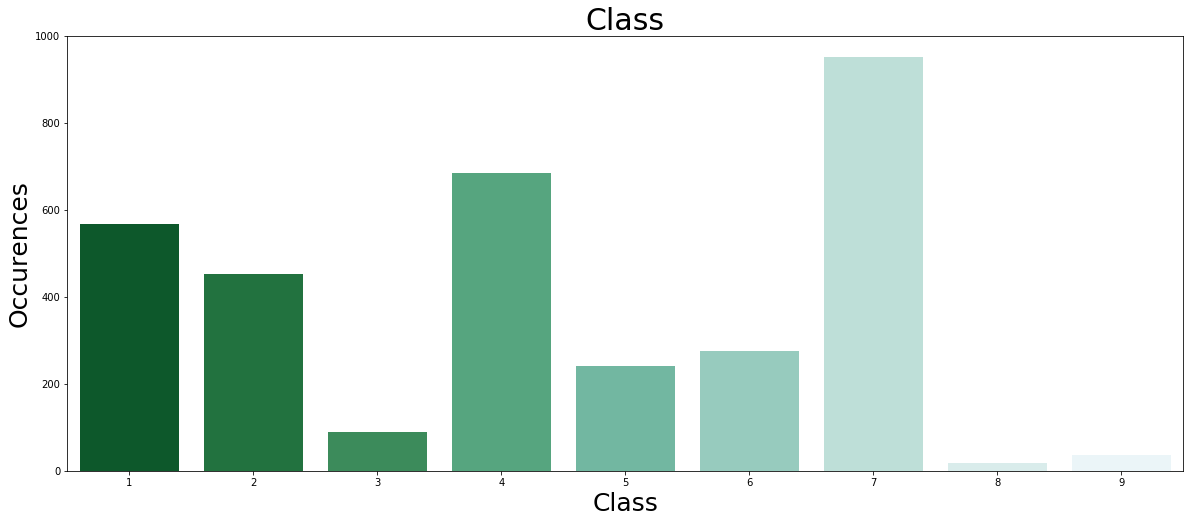

In [21]:
class_ = training_variants.Class.value_counts().reset_index()
# class_ = class_.head(30)
plt.figure(figsize = (20,8))
sns.barplot(class_['index'], class_.Class, palette="BuGn_r")
plt.title('Class', fontsize = 30)
plt.xlabel('Class', fontsize = 25)
plt.ylabel('Occurences', fontsize = 25)
plt.show()

### Exploring dataset - training_variants's gene exploration

In [22]:
training_variants['Gene'].nunique()

264

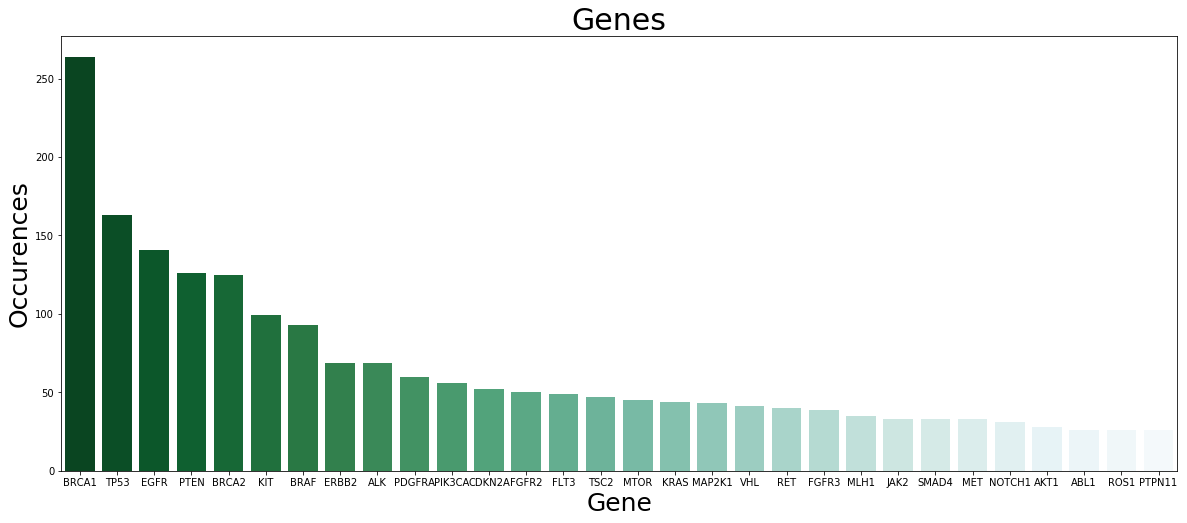

In [23]:
gene = training_variants.Gene.value_counts().reset_index()
gene = gene.head(30)
plt.figure(figsize = (20,8))
sns.barplot(gene['index'], gene.Gene, palette="BuGn_r")
plt.title('Genes', fontsize = 30)
plt.xlabel('Gene', fontsize = 25)
plt.ylabel('Occurences', fontsize = 25)
plt.show()

### Exploring dataset - training_variants's variation exploration

In [25]:
training_variants['Variation'].nunique()

2996

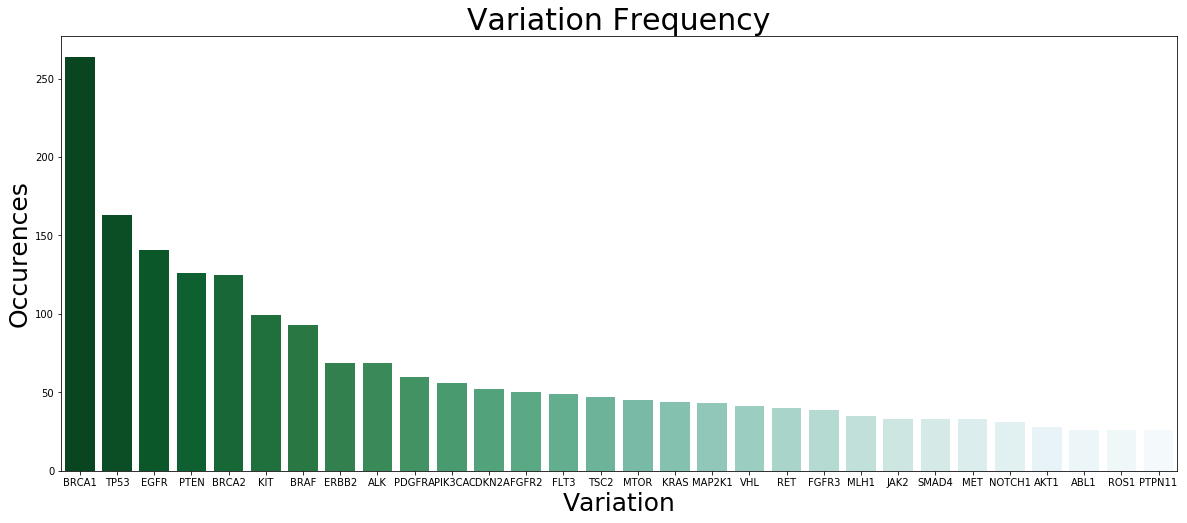

In [26]:
variation = training_variants.Variation.value_counts().reset_index()
variation = variation.head(30)
plt.figure(figsize = (20,8))
sns.barplot(gene['index'], gene.Gene, palette="BuGn_r")
plt.title('Variation Frequency', fontsize = 30)
plt.ylabel('Occurences', fontsize = 25)
plt.xlabel('Variation', fontsize = 25)
plt.show()

### Exploring dataset - training_text exploration

In [37]:
#Training Text Data
complete_train_df = training_variants.merge(training_text, how="inner", left_on="ID", right_on="ID")

In [38]:
complete_train_df.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [49]:
complete_train_df['Token'] = complete_train_df['Text'].str.split()

In [53]:
complete_train_df['Count'] = complete_train_df['Token'].str.len() 

In [54]:
complete_train_df

,ID,Gene,Variation,Class,Text,Count,Token
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,6089,"[Cyclin-dependent, kinases, (CDKs), regulate, ..."
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,5756,"[Abstract, Background, Non-small, cell, lung, ..."
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,5756,"[Abstract, Background, Non-small, cell, lung, ..."
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,5572,"[Recent, evidence, has, demonstrated, that, ac..."
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,6202,"[Oncogenic, mutations, in, the, monomeric, Cas..."
5,5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...,6202,"[Oncogenic, mutations, in, the, monomeric, Cas..."
6,6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...,6202,"[Oncogenic, mutations, in, the, monomeric, Cas..."
7,7,CBL,Deletion,1,CBL is a negative regulator of activated recep...,14683,"[CBL, is, a, negative, regulator, of, activate..."
8,8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...,11923,"[Abstract, Juvenile, myelomonocytic, leukemia,..."
9,9,CBL,C384R,4,Abstract Juvenile myelomonocytic leukemia (JM...,5721,"[Abstract, Juvenile, myelomonocytic, leukemia,..."


In [55]:
complete_train_df[complete_train_df["Count"] == 1]

,ID,Gene,Variation,Class,Text,Count,Token
1109,1109,FANCA,S1088F,1,null,1,[null]
1277,1277,ARID5B,Truncating Mutations,1,null,1,[null]
1407,1407,FGFR3,K508M,6,null,1,[null]
1639,1639,FLT1,Amplification,6,null,1,[null]
2755,2755,BRAF,G596C,7,null,1,[null]


In [57]:
complete_train_df[complete_train_df['Count']>=100].count()

ID           3315
Gene         3315
Variation    3315
Class        3315
Text         3315
Count        3315
Token        3315
dtype: int64

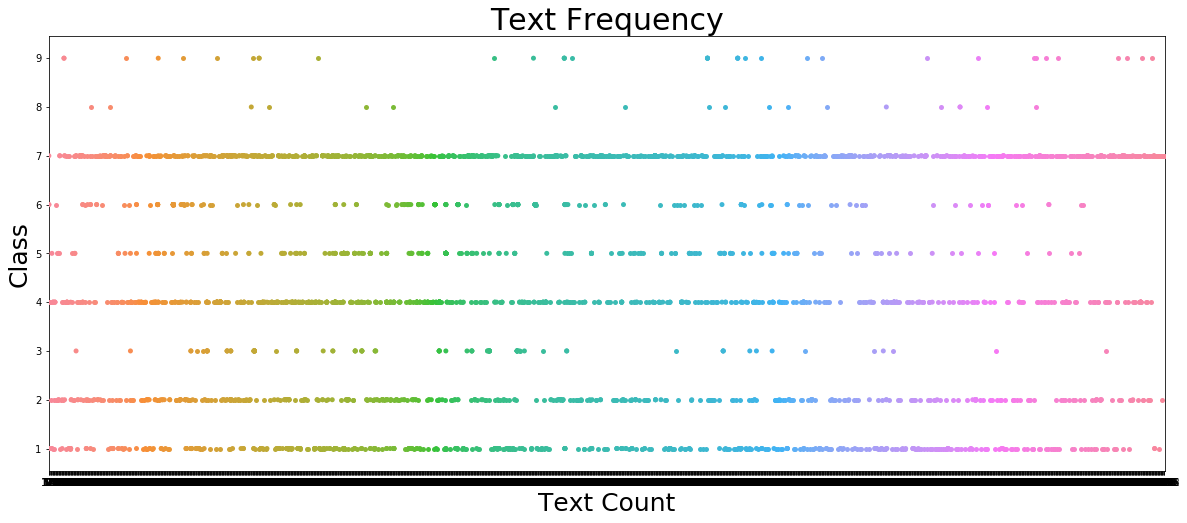

In [59]:
plt.figure(figsize = (20,8))
sns.stripplot(x='Count', y='Class', data=complete_train_df)
plt.title('Text Frequency', fontsize = 30)
plt.ylabel('Class', fontsize = 25)
plt.xlabel('Text Count', fontsize = 25)
plt.show()